# Correlate wind data from Neah Bay DFO buoy 46206

In [1]:
# import modules

import xarray as xr
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.dates as pldates
import scipy.signal as sig
import numpy as np
import pandas as pd
import scipy.stats as stat
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
for i in range(2):
    %matplotlib notebook

In [2]:
# import data

year = 2013
adcp = 'Slope'
t_stamp = f'{year}'
start_date = np.datetime64(f'{year}-01-01')
end_date = np.datetime64(f'{year+1}-01-01')

# cw wind power
cw_in = xr.open_dataset(f'../../../Data/wind/cw_inertial_{year}_0.nc')
cw_seg = cw_in.n_seg
if cw_seg > 1:
    cw = [cw_in]
    for i in range(cw_seg):
        if i > 0:
            cw_temp = xr.open_dataset(f'../../../Data/wind/cw_inertial_{year}_{i}.nc')
            cw.append(cw_temp)
elif cw_seg == 1:
    cw = [cw_in]

# cw adcp near-inertial power
site_in = xr.open_dataset(f'../../../Data/wind/cw_inertial_{adcp}_{year}_0.nc')
site_seg = site_in.n_seg
if site_seg > 1:
    site = [site_in]
    for i in range(site_seg):
        if i > 0:
            site_temp = xr.open_dataset(f'../../../Data/wind/cw_inertial_{adcp}_{year}_{i}.nc')
            site.append(site_temp)
elif site_seg == 1:
    site = [site_in]

In [3]:
# average and align time segments

d_up_idx = site[0].d_up_idx
d_low_idx = site[0].d_low_idx
if adcp == 'Slope':
    depth_up = 30
    depth_low = 290
elif adcp == 'Axis75' or adcp == 'Axis55':
    depth_up = 700
    depth_low = 960

site_ts = []
for i in range(site_seg):
    site_ts_temp = site[i].cw.sel(depth=slice(depth_up,depth_low))
    site_ts_temp = site_ts_temp.rolling(time=7,center=True).mean().dropna('time')
    site_ts_temp = site_ts_temp.mean('depth')
    site_ts.append(site_ts_temp)
    
cw_ts = []
for i in range(cw_seg):
    cw_ts_temp = cw[i].cw
    cw_ts_temp = cw_ts_temp.rolling(time=21,center=True).mean().dropna('time')
    cw_ts.append(cw_ts_temp)

if adcp == 'Slope':
    if year == 2013:
        startx1 = np.datetime64(f'{year}-01-11')                # start date
        endx1 = np.datetime64(f'{year}-03-30')                  # end date
        startx2 = np.datetime64(f'{year}-04-02')                # start date
        endx2 = np.datetime64(f'{year}-06-30')                  # end date
        startx3 = np.datetime64(f'{year}-07-03')                # start date
        endx3 = np.datetime64(f'{year}-09-30')                  # end date
        startx4 = np.datetime64(f'{year}-10-03')                # start date
        endx4 = np.datetime64(f'{year}-12-25')                  # end date
        startx = [startx1,startx2,startx3,startx4]
        endx = [endx1,endx2,endx3,endx4]
        n_corr = len(startx)
        cw_corr,site_corr = [],[]
        for i in range(n_corr):
            cw_corr.append(cw_ts[0].sel(time=slice(startx[i],endx[i])))
            site_corr.append(site_ts[0].sel(time=slice(startx[i],endx[i])))
    if year == 2014:
        startx3 = np.datetime64(f'{year}-07-03')                # start date
        endx3 = np.datetime64(f'{year}-09-30')                  # end date
        startx4 = np.datetime64(f'{year}-10-03')                # start date
        endx4 = np.datetime64(f'{year}-12-25')                  # end date
        startx = [startx3,startx4]
        endx = [endx3,endx4]
        n_corr = len(startx)
        cw_corr,site_corr = [],[]
        for i in range(n_corr):
            cw_corr.append(cw_ts[1].sel(time=slice(startx[i],endx[i])))
            site_corr.append(site_ts[0].sel(time=slice(startx[i],endx[i])))
    if year == 2017:
        startx1 = np.datetime64(f'{year}-01-11')                # start date
        endx1 = np.datetime64(f'{year}-03-30')                  # end date
        startx2 = np.datetime64(f'{year}-04-02')                # start date
        endx2 = np.datetime64(f'{year}-06-30')                  # end date
        startx = [startx1,startx2]
        endx = [endx1,endx2]
        n_corr = len(startx)
        cw_corr,site_corr = [],[]
        for i in range(n_corr):
            cw_corr.append(cw_ts[0].sel(time=slice(startx[i],endx[i])))
            site_corr.append(site_ts[0].sel(time=slice(startx[i],endx[i])))
    if year == 2018:
        startx1 = np.datetime64(f'{year}-01-11')                # start date
        endx1 = np.datetime64(f'{year}-03-30')                  # end date
        startx2 = np.datetime64(f'{year}-04-02')                # start date
        endx2 = np.datetime64(f'{year}-06-30')                  # end date
        startx = [startx1,startx2]
        endx = [endx1,endx2]
        n_corr = len(startx)
        cw_corr,site_corr = [],[]
        for i in range(n_corr):
            cw_corr.append(cw_ts[0].sel(time=slice(startx[i],endx[i])))
            site_corr.append(site_ts[0].sel(time=slice(startx[i],endx[i])))
elif adcp == 'Axis75':
    if year == 2013:
        startx1 = np.datetime64(f'{year}-01-11')                # start date
        endx1 = np.datetime64(f'{year}-03-30')                  # end date
        startx3 = np.datetime64(f'{year}-07-03')                # start date
        endx3 = np.datetime64(f'{year}-09-30')                  # end date
        startx4 = np.datetime64(f'{year}-10-03')                # start date
        endx4 = np.datetime64(f'{year}-12-25')                  # end date
        startx = [startx1,startx3,startx4]
        endx = [endx1,endx3,endx4]
        n_corr = len(startx)
        cw_corr,site_corr = [],[]
        for i in [0]:
            cw_corr.append(cw_ts[0].sel(time=slice(startx[i],endx[i])))
            site_corr.append(site_ts[0].sel(time=slice(startx[i],endx[i])))
        for i in [1,2]:
            cw_corr.append(cw_ts[0].sel(time=slice(startx[i],endx[i])))
            site_corr.append(site_ts[1].sel(time=slice(startx[i],endx[i])))
    if year == 2014:
        startx3 = np.datetime64(f'{year}-07-03')                # start date
        endx3 = np.datetime64(f'{year}-09-30')                  # end date
        startx4 = np.datetime64(f'{year}-10-03')                # start date
        endx4 = np.datetime64(f'{year}-12-25')                  # end date
        startx = [startx3,startx4]
        endx = [endx3,endx4]
        n_corr = len(startx)
        cw_corr,site_corr = [],[]
        for i in range(n_corr):
            cw_corr.append(cw_ts[1].sel(time=slice(startx[i],endx[i])))
            site_corr.append(site_ts[2].sel(time=slice(startx[i],endx[i])))
elif adcp == 'Axis55':
    if year == 2017:
        startx1 = np.datetime64(f'{year}-01-25')                # start date
        endx1 = np.datetime64(f'{year}-03-30')                  # end date
        startx2 = np.datetime64(f'{year}-04-02')                # start date
        endx2 = np.datetime64(f'{year}-06-30')                  # end date
        startx = [startx1,startx2]
        endx = [endx1,endx2]
        n_corr = len(startx)
        cw_corr,site_corr = [],[]
        for i in range(n_corr):
            cw_corr.append(cw_ts[0].sel(time=slice(startx[i],endx[i])))
            site_corr.append(site_ts[0].sel(time=slice(startx[i],endx[i])))
    if year == 2018:
        startx1 = np.datetime64(f'{year}-01-11')                # start date
        endx1 = np.datetime64(f'{year}-03-30')                  # end date
        startx2 = np.datetime64(f'{year}-04-02')                # start date
        endx2 = np.datetime64(f'{year}-06-05')                  # end date
        startx = [startx1,startx2]
        endx = [endx1,endx2]
        n_corr = len(startx)
        cw_corr,site_corr = [],[]
        for i in range(n_corr):
            cw_corr.append(cw_ts[0].sel(time=slice(startx[i],endx[i])))
            site_corr.append(site_ts[0].sel(time=slice(startx[i],endx[i])))

In [4]:
# correlations

scorr,s_,SEr,site_scat = [],[],[],[]
for i in range(n_corr):
    testx = [startx[i],endx[i]]                            # x range for visual
    testy = [-0.0001,-0.0001]                            # y range for visual    
    cw_t = cw_corr[i].time.values.astype('float')             # wind times as float
    site_t = site_corr[i].time.values.astype('float')         # adcp times as float
    site_int = np.interp(cw_t,site_t,site_corr[i].values)     # interpolation to finer wind times
    site_scat.append(site_int)
    scorr_temp,s_temp = stat.pearsonr(cw_corr[i],site_int)#,nan_policy='omit')   # pearson correlation coefficient (linear)
    scorr.append(scorr_temp)
    s_.append(s_temp)
    N = len(site_int)                                         # number of samples
    SEr.append(np.sqrt( (1 - (scorr_temp**2))/(N-2) ))                # standard error of the correlation coefficient

<IPython.core.display.Javascript object>


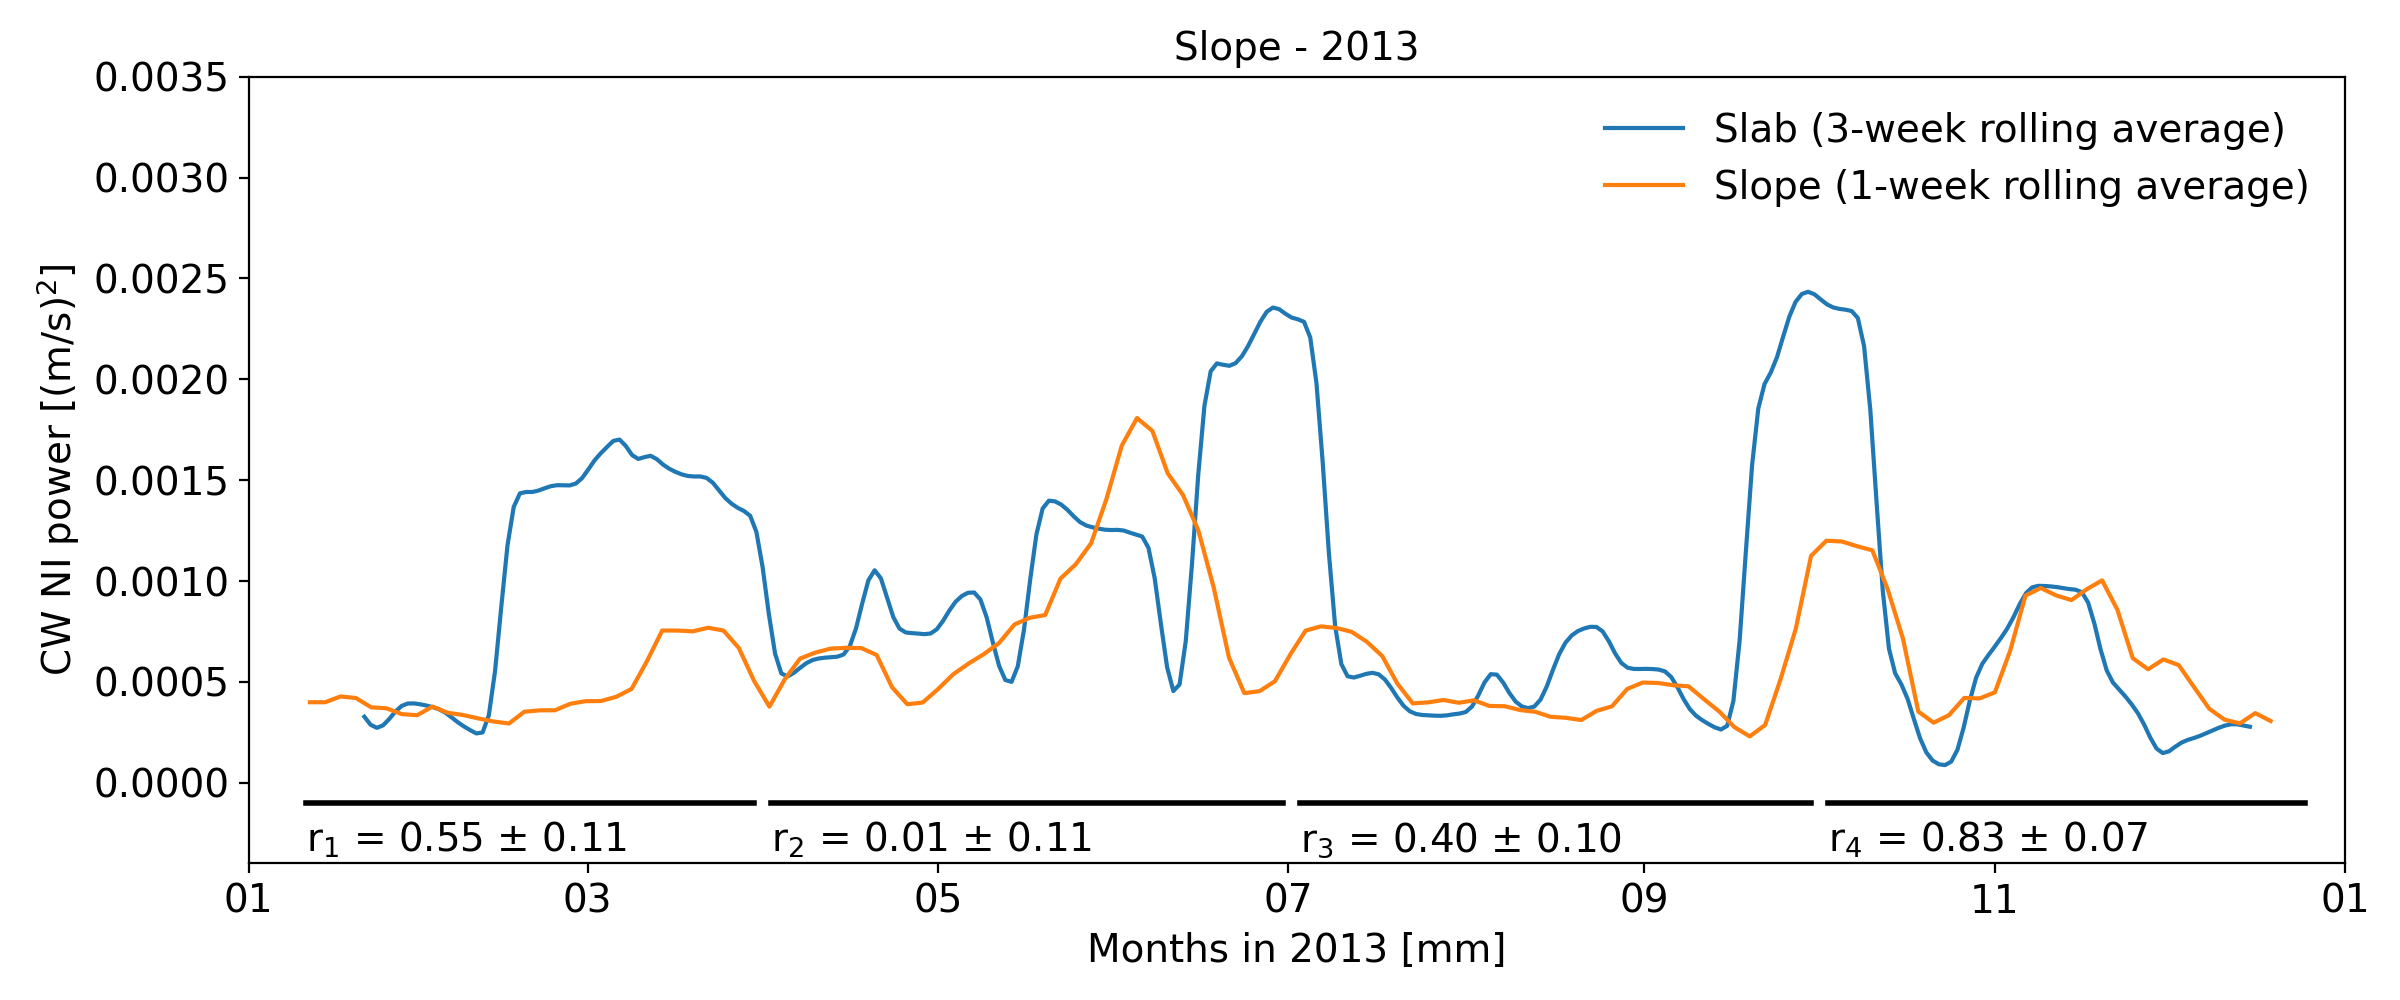

In [5]:
# plot band-passed integrated rotary data

fig, ax0 = plt.subplots(1,1,figsize=(12,5),sharex=True,sharey=True)
ax0.set_title(f'{adcp} - {t_stamp}',fontsize=14)

for i in range(n_corr):
    ax0.plot([startx[i],endx[i]],testy,color='black',lw=2)
    ax0.text(startx[i],-0.00034,rf'r$_{i+1}$ = %.2f $\pm$ %.2f' % (scorr[i], SEr[i]),fontsize=14) 
        
for i in range(cw_seg):
    if i == 0:
        ax0.plot(cw_ts[i].time,cw_ts[i],color='tab:blue',label='Slab (3-week rolling average)')
    elif i > 0:
        ax0.plot(cw_ts[i].time,cw_ts[i],color='tab:blue',label='_nolabel_')     
for i in range(site_seg):
    if i == 0:
        ax0.plot(site_ts[i].time,site_ts[i],color='tab:orange',label=f'{adcp} (1-week rolling average)')# : {site[0].depth_up} - {site[0].depth_low} m')
    elif i > 0:
        ax0.plot(site_ts[i].time,site_ts[i],color='tab:orange',label='_nolabel_')
        
ax0.set_xlabel(f'Months in {t_stamp} [mm]',fontsize=14)
ax0.set_ylabel(r'CW NI power [(m/s)$^2$]',fontsize=14)
date_form = pldates.DateFormatter("%m")
ax0.xaxis.set_major_formatter(date_form)
ax0.set_xlim(start_date,end_date)
ax0.set_ylim(-0.0004,0.0035)
ax0.tick_params(labelsize=14)
fig.tight_layout()

plt.legend(fontsize=14,frameon=False,ncol=1)
plt.show()

plt.savefig(fname=f'./wind_corr_{adcp}_{t_stamp}.pdf',format='pdf')

<IPython.core.display.Javascript object>


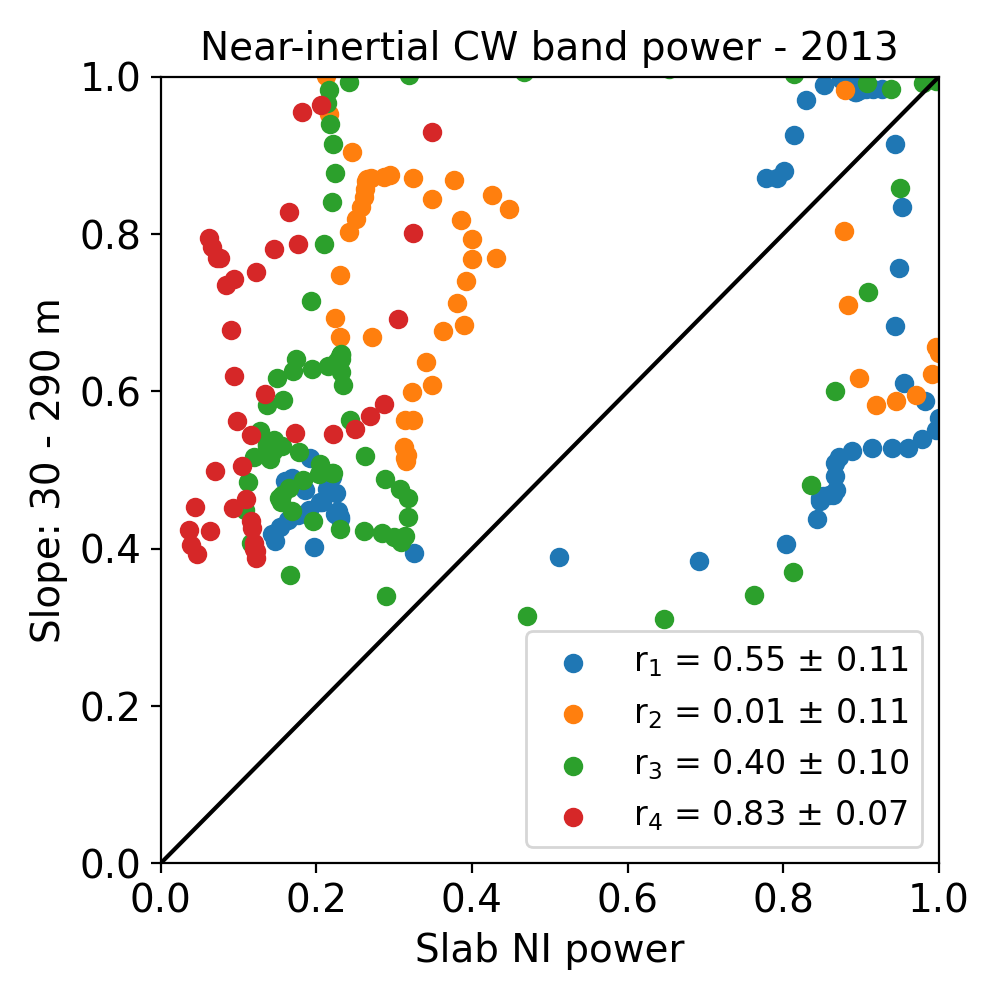

In [6]:
# plot band-passed integrated rotary data

fig, ax0 = plt.subplots(1,1,figsize=(5,5),sharex=True,sharey=True)
ax0.set_title(f'Near-inertial CW band power - {t_stamp}',fontsize=14)

colours = ['tab:blue','tab:orange','tab:green','tab:red']
ax0.plot((0,1),(0,1),color='black')
for i in range(n_corr):
    ax0.scatter(cw_corr[i]/np.max(cw_corr[i]),site_scat[i]/np.max(site_scat[0]),\
            label=fr'r$_{i+1}$ = %.2f $\pm$ %.2f' % (scorr[i],SEr[i]))

ax0.set_xlabel(r'Slab NI power',fontsize=14)
ax0.set_ylabel(f'{adcp}: {depth_up} - {depth_low} m',fontsize=14)
ax0.set_xlim(0,1)
ax0.set_ylim(0,1)
ax0.tick_params(labelsize=14)
fig.tight_layout()

plt.legend(fontsize=12,frameon=True,loc='lower right', bbox_transform=ax0.transAxes)
plt.show()

plt.savefig(fname=f'./wind_scatter_{adcp}_{t_stamp}.pdf',format='pdf')

In [7]:
# save to .nc for inter-annual comparison

for i in range(cw_seg):
    ds_cwx = xr.Dataset( 
        data_vars=dict(
            cw=(['cw_time'], cw_ts[i]),        
        ),
        coords=dict(
            cw_time=cw_ts[i].time.values,       # datetime values in segments
        ),
        attrs=dict(
            #description=f'Depth-band WKB rotary {f_name} data for {adcp} {t_stamp} segment {i} (from 0 to {n_seg - 1}).',
            adcp=adcp,                   # adcp
            #upidx=upidx,                 # upper depth index
            #lowidx=lowidx,               # lower depth index
            #dup_stamp=dup_stamp,         # upper depth stamp
            #dlow_stamp=dlow_stamp,       # lower depth stamp
            t_stamp=t_stamp,             # year stamp
            #tart_date=f'{start_date}',  # start date
            #end_date=f'{end_date}',      # end date
            #t=t,                         # length of time series
            #d=d,                         # length of depth series
            cw_seg=cw_seg,                 # total number of segments
        ),
    ) 
    ds_cwx.to_netcdf(f'../../../Data/interannual/wind_cw_corr_{adcp}_{t_stamp}_{i}.nc')
for i in range(site_seg):
    ds_sitex = xr.Dataset( 
        data_vars=dict(
            site=(['site_time'], site_ts[i]),        
        ),
        coords=dict(
            site_time=site_ts[i].time.values,       # datetime values in segments
        ),
        attrs=dict(
            #description=f'Depth-band WKB rotary {f_name} data for {adcp} {t_stamp} segment {i} (from 0 to {n_seg - 1}).',
            adcp=adcp,                   # adcp
            #upidx=upidx,                 # upper depth index
            #lowidx=lowidx,               # lower depth index
            #dup_stamp=dup_stamp,         # upper depth stamp
            #dlow_stamp=dlow_stamp,       # lower depth stamp
            t_stamp=t_stamp,             # year stamp
            #tart_date=f'{start_date}',  # start date
            #end_date=f'{end_date}',      # end date
            #t=t,                         # length of time series
            #d=d,                         # length of depth series
            site_seg=site_seg,                 # total number of segments
        ),
    ) 
    ds_sitex.to_netcdf(f'../../../Data/interannual/wind_site_{adcp}_{t_stamp}_{i}.nc')
for i in range(n_corr):
    ds_scatx = xr.Dataset( 
        data_vars=dict(
            cw_corr=(['scat_time'], cw_corr[i]),
            site_scat=(['scat_time'],site_scat[i],)
        ),
        coords=dict(
            scat_time=cw_corr[i].time.values,       # datetime values in segments
        ),
        attrs=dict(
            #description=f'Depth-band WKB rotary {f_name} data for {adcp} {t_stamp} segment {i} (from 0 to {n_seg - 1}).',
            startx = str(startx[i]),
            endx=str(endx[i]),
            scorr=scorr[i],
            SEr = SEr[i],
            adcp=adcp,                   # adcp
            #upidx=upidx,                 # upper depth index
            #lowidx=lowidx,               # lower depth index
            #dup_stamp=dup_stamp,         # upper depth stamp
            #dlow_stamp=dlow_stamp,       # lower depth stamp
            t_stamp=t_stamp,             # year stamp
            #tart_date=f'{start_date}',  # start date
            #end_date=f'{end_date}',      # end date
            #t=t,                         # length of time series
            #d=d,                         # length of depth series
            n_corr=n_corr,                 # total number of segments
        ),
    )   
    ds_scatx.to_netcdf(f'../../../Data/interannual/wind_scat_{adcp}_{t_stamp}_{i}.nc')

## Inter-annual comparisons

In [6]:
# load data

site = 'Axis'

ds_cw_2013,ds_cw_2014,ds_cw_2017,ds_cw_2018 = [],[],[],[]
ds_site_2013,ds_site_2014,ds_site_2017,ds_site_2018 = [],[],[],[]
ds_scat_2013,ds_scat_2014,ds_scat_2017,ds_scat_2018 = [],[],[],[]

if site == 'Slope':
    ds_cw_2013.append( xr.open_dataset(f'../../../Data/interannual/wind_cw_corr_{site}_2013_0.nc') ) # 2013
    ds_site_2013.append( xr.open_dataset(f'../../../Data/interannual/wind_site_{site}_2013_0.nc') )
    ds_scat_2013.append( xr.open_dataset(f'../../../Data/interannual/wind_scat_{site}_2013_0.nc') )
    ds_scat_2013.append( xr.open_dataset(f'../../../Data/interannual/wind_scat_{site}_2013_1.nc') )
    ds_scat_2013.append( xr.open_dataset(f'../../../Data/interannual/wind_scat_{site}_2013_2.nc') )
    ds_scat_2013.append( xr.open_dataset(f'../../../Data/interannual/wind_scat_{site}_2013_3.nc') )
    ds_cw_2014.append( xr.open_dataset(f'../../../Data/interannual/wind_cw_corr_{site}_2014_1.nc') ) # 2014  ########issue with 0 file
    ds_cw_2014.append( xr.open_dataset(f'../../../Data/interannual/wind_cw_corr_{site}_2014_1.nc') ) # for now copy of 1 file
    ds_site_2014.append( xr.open_dataset(f'../../../Data/interannual/wind_site_{site}_2014_0.nc') )
    ds_scat_2014.append( xr.open_dataset(f'../../../Data/interannual/wind_scat_{site}_2014_0.nc') )
    ds_scat_2014.append( xr.open_dataset(f'../../../Data/interannual/wind_scat_{site}_2014_1.nc') )
    ds_cw_2017.append( xr.open_dataset(f'../../../Data/interannual/wind_cw_corr_{site}_2017_0.nc') ) # 2017
    ds_cw_2017.append( xr.open_dataset(f'../../../Data/interannual/wind_cw_corr_{site}_2017_1.nc') )
    ds_cw_2017.append( xr.open_dataset(f'../../../Data/interannual/wind_cw_corr_{site}_2017_2.nc') ) 
    ds_site_2017.append( xr.open_dataset(f'../../../Data/interannual/wind_site_{site}_2017_0.nc') )
    ds_site_2017.append( xr.open_dataset(f'../../../Data/interannual/wind_site_{site}_2017_1.nc') )
    ds_scat_2017.append( xr.open_dataset(f'../../../Data/interannual/wind_scat_{site}_2017_0.nc') )
    ds_scat_2017.append( xr.open_dataset(f'../../../Data/interannual/wind_scat_{site}_2017_1.nc') )
    ds_cw_2018.append( xr.open_dataset(f'../../../Data/interannual/wind_cw_corr_{site}_2018_0.nc') ) # 2018
    ds_site_2018.append( xr.open_dataset(f'../../../Data/interannual/wind_site_{site}_2018_0.nc') )
    ds_scat_2018.append( xr.open_dataset(f'../../../Data/interannual/wind_scat_{site}_2018_0.nc') )
    ds_scat_2018.append( xr.open_dataset(f'../../../Data/interannual/wind_scat_{site}_2018_1.nc') )
    
elif site == 'Axis':
    ds_cw_2013.append( xr.open_dataset(f'../../../Data/interannual/wind_cw_corr_{site}75_2013_0.nc') ) # 2013
    ds_site_2013.append( xr.open_dataset(f'../../../Data/interannual/wind_site_{site}75_2013_0.nc') )
    ds_site_2013.append( xr.open_dataset(f'../../../Data/interannual/wind_site_{site}75_2013_1.nc') )
    ds_scat_2013.append( xr.open_dataset(f'../../../Data/interannual/wind_scat_{site}75_2013_0.nc') )
    ds_scat_2013.append( xr.open_dataset(f'../../../Data/interannual/wind_scat_{site}75_2013_1.nc') )
    ds_scat_2013.append( xr.open_dataset(f'../../../Data/interannual/wind_scat_{site}75_2013_2.nc') )
    ds_cw_2014.append( xr.open_dataset(f'../../../Data/interannual/wind_cw_corr_{site}75_2014_1.nc') ) # 2014 ### issue with 0 array
    ds_cw_2014.append( xr.open_dataset(f'../../../Data/interannual/wind_cw_corr_{site}75_2014_1.nc') ) # for now copy of 1 array
    ds_site_2014.append( xr.open_dataset(f'../../../Data/interannual/wind_site_{site}75_2014_0.nc') )
    ds_site_2014.append( xr.open_dataset(f'../../../Data/interannual/wind_site_{site}75_2014_1.nc') )
    ds_site_2014.append( xr.open_dataset(f'../../../Data/interannual/wind_site_{site}75_2014_2.nc') )
    ds_scat_2014.append( xr.open_dataset(f'../../../Data/interannual/wind_scat_{site}75_2014_0.nc') )
    ds_scat_2014.append( xr.open_dataset(f'../../../Data/interannual/wind_scat_{site}75_2014_1.nc') )
    ds_cw_2017.append( xr.open_dataset(f'../../../Data/interannual/wind_cw_corr_{site}55_2017_0.nc') ) # 2017
    ds_cw_2017.append( xr.open_dataset(f'../../../Data/interannual/wind_cw_corr_{site}55_2017_1.nc') )
    ds_cw_2017.append( xr.open_dataset(f'../../../Data/interannual/wind_cw_corr_{site}55_2017_2.nc') ) 
    ds_site_2017.append( xr.open_dataset(f'../../../Data/interannual/wind_site_{site}55_2017_0.nc') )
    ds_site_2017.append( xr.open_dataset(f'../../../Data/interannual/wind_site_{site}55_2017_1.nc') )
    ds_scat_2017.append( xr.open_dataset(f'../../../Data/interannual/wind_scat_{site}55_2017_0.nc') )
    ds_scat_2017.append( xr.open_dataset(f'../../../Data/interannual/wind_scat_{site}55_2017_1.nc') )
    ds_cw_2018.append( xr.open_dataset(f'../../../Data/interannual/wind_cw_corr_{site}55_2018_0.nc') ) # 2018
    ds_site_2018.append( xr.open_dataset(f'../../../Data/interannual/wind_site_{site}55_2018_0.nc') )
    ds_site_2018.append( xr.open_dataset(f'../../../Data/interannual/wind_site_{site}55_2018_1.nc') )
    ds_site_2018.append( xr.open_dataset(f'../../../Data/interannual/wind_site_{site}55_2018_2.nc') )
    ds_site_2018.append( xr.open_dataset(f'../../../Data/interannual/wind_site_{site}55_2018_3.nc') )
    ds_scat_2018.append( xr.open_dataset(f'../../../Data/interannual/wind_scat_{site}55_2018_0.nc') )
    ds_scat_2018.append( xr.open_dataset(f'../../../Data/interannual/wind_scat_{site}55_2018_1.nc') )

<IPython.core.display.Javascript object>


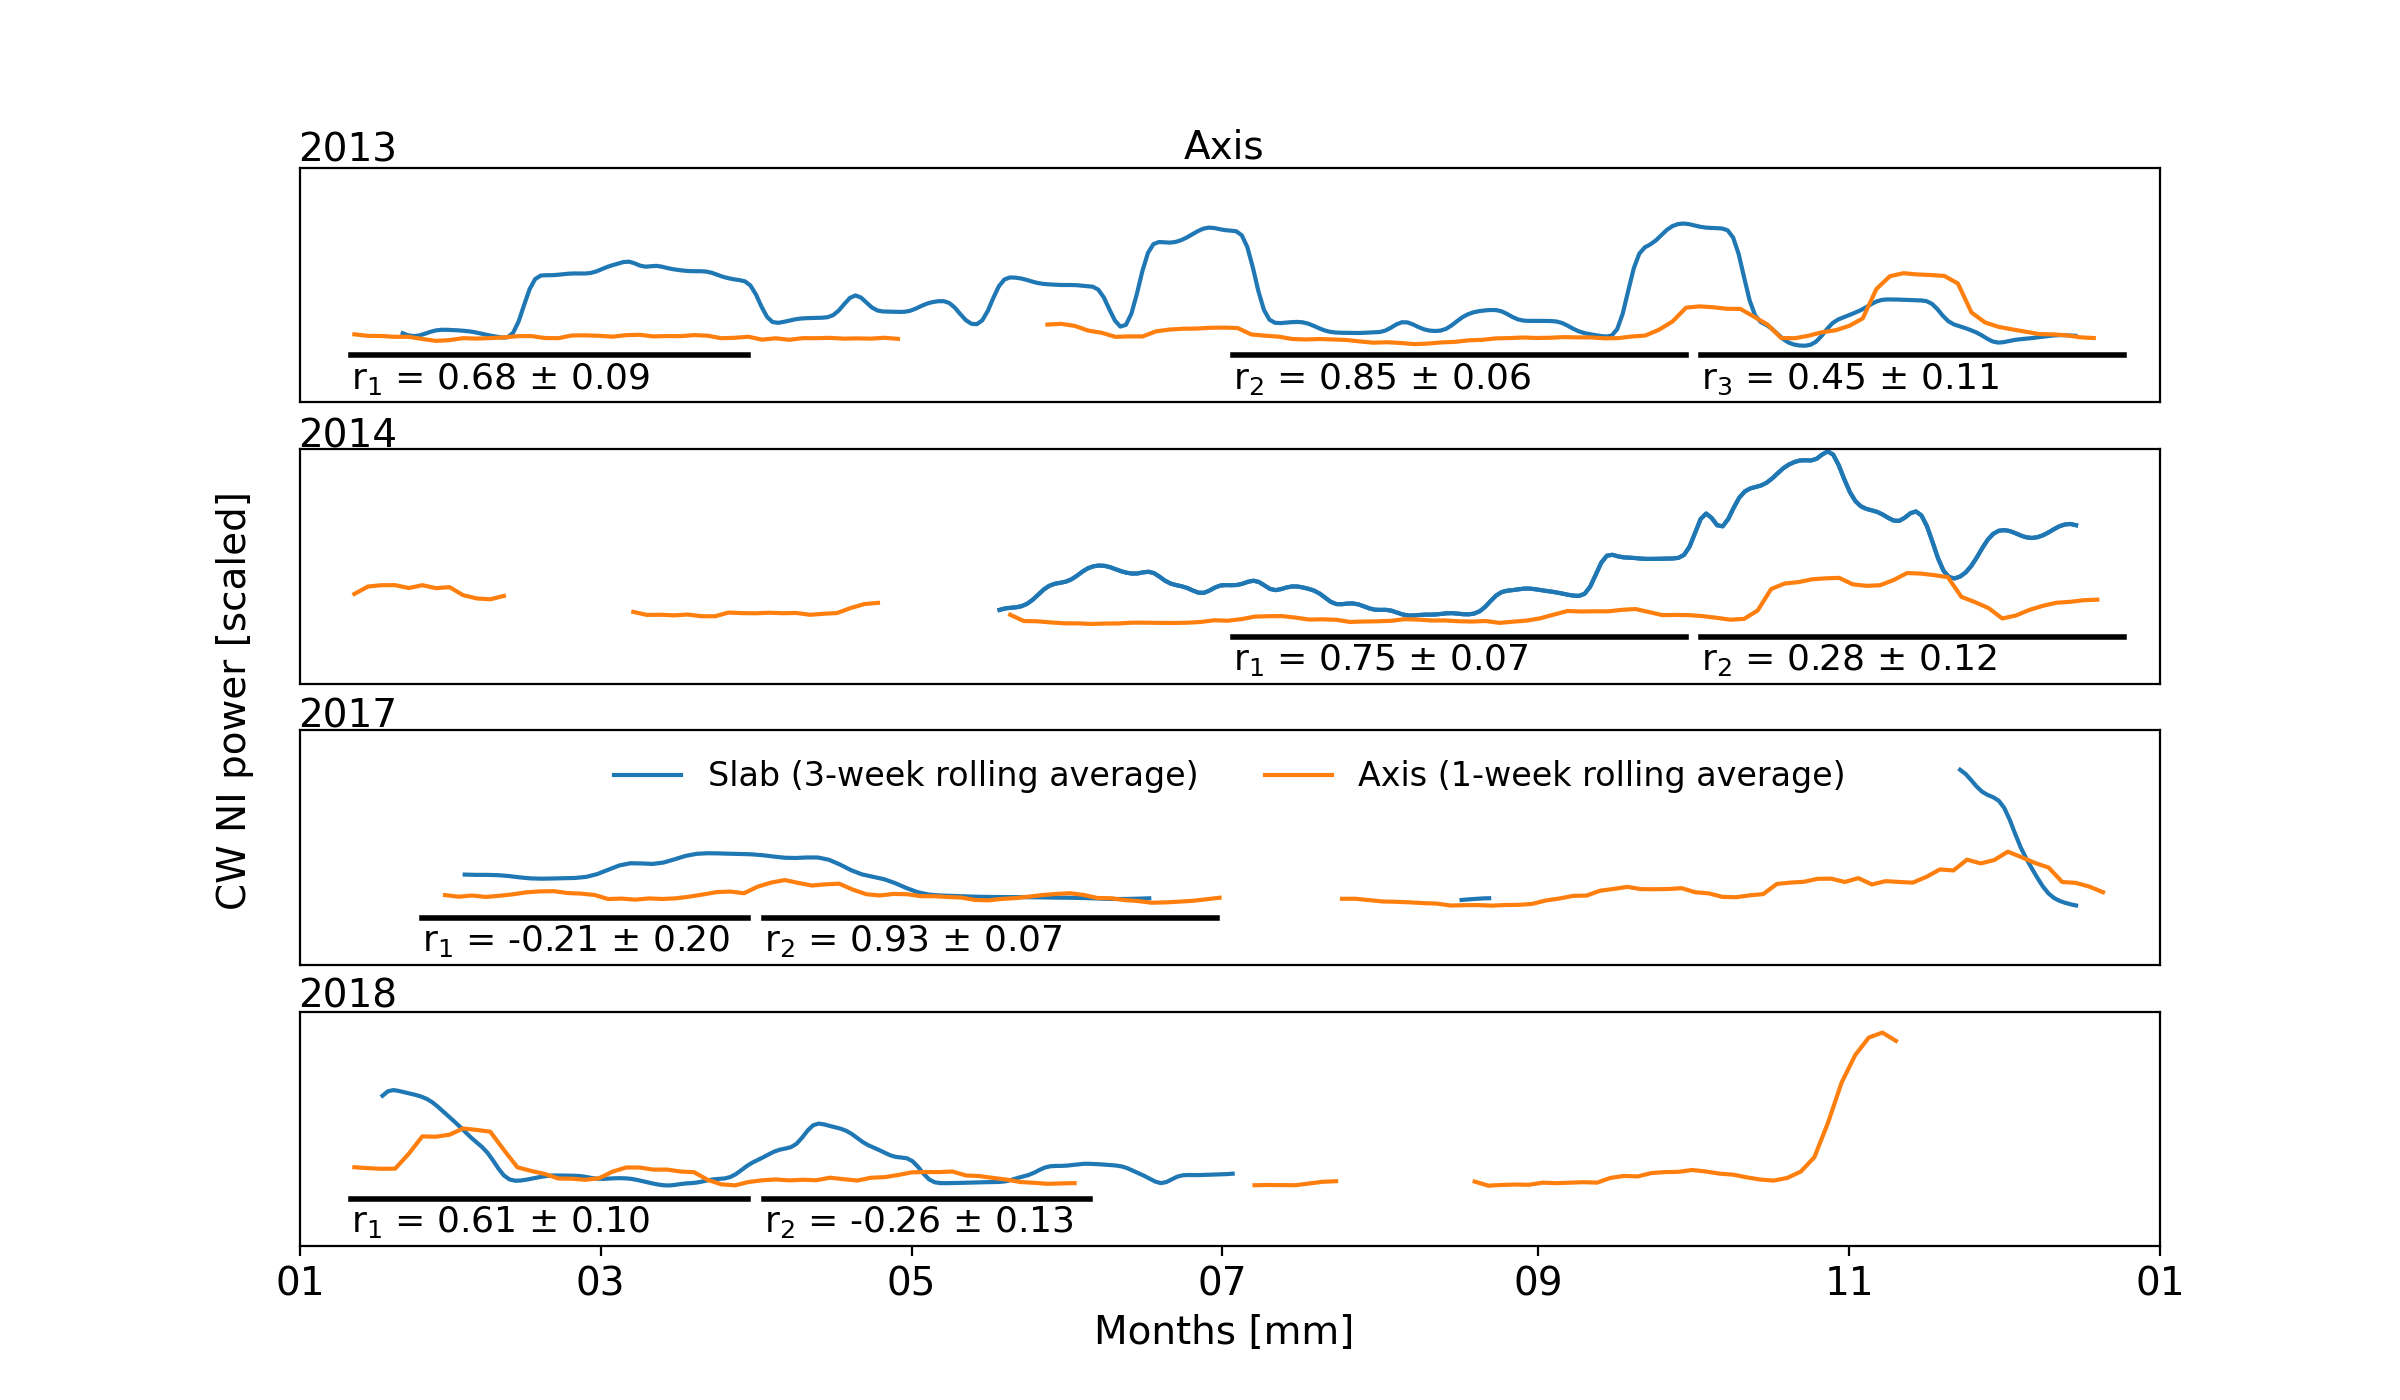

In [7]:
# plot inter-annual correlations

fig, [ax0,ax1,ax2,ax3] = plt.subplots(4,1,figsize=(12,7),sharex=False,sharey=True)

axes = [ax0,ax1,ax2,ax3]
testy=[-0.0001,-0.0001]
scats = [ds_scat_2013,ds_scat_2014,ds_scat_2017,ds_scat_2018]
cws = [ds_cw_2013,ds_cw_2014,ds_cw_2017,ds_cw_2018]
sites = [ds_site_2013,ds_site_2014,ds_site_2017,ds_site_2018]

for j,k in enumerate(scats):
    for i in range(k[0].n_corr):
        axes[j].plot([np.datetime64(k[i].startx),np.datetime64(k[i].endx)],testy,color='black',lw=2)
        axes[j].text(k[i].startx,-0.00074,rf'r$_{i+1}$ = %.2f $\pm$ %.2f' % (k[i].scorr, k[i].SEr),fontsize=13) 
        axes[j].set_xlim(np.datetime64(f'{k[i].t_stamp}-01-01'),np.datetime64(f'{str(int(k[i].t_stamp)+1)}-01-01'))
        
for j,k in enumerate(cws):        
    for i in range(k[0].cw_seg):
        if i == 0:
            axes[j].plot(k[i].cw_time,k[i].cw,color='tab:blue',label='Slab (3-week rolling average)')
        elif i > 0:
            axes[j].plot(k[i].cw_time,k[i].cw,color='tab:blue',label='_nolabel_')     

for j,k in enumerate(sites):            
    for i in range(k[0].site_seg):
        if i == 0:
            axes[j].plot(k[i].site_time,k[i].site*1.7,color='tab:orange',label=f'{site} (1-week rolling average)')# : {site[0].depth_up} - {site[0].depth_low} m')
        elif i > 0:
            axes[j].plot(k[i].site_time,k[i].site*1.7,color='tab:orange',label='_nolabel_')
        
fig.text(0.51,0.887,f'{site}',ha='center',fontsize=14)
fig.text(0.145,0.885,f'2013',ha='center',fontsize=14)
fig.text(0.145,0.68,f'2014',ha='center',fontsize=14)
fig.text(0.145,0.48,f'2017',ha='center',fontsize=14)
fig.text(0.145,0.28,f'2018',ha='center',fontsize=14)
fig.text(0.51,0.04,f'Months [mm]',ha='center',fontsize=14)
fig.text(0.09,0.5,r'CW NI power [scaled]',va='center',rotation='vertical',fontsize=14)

date_form = pldates.DateFormatter("%m")
for i in axes:
    i.xaxis.set_major_formatter(date_form)
    i.set_ylim(-0.001,0.0035)
    i.tick_params(labelsize=14)
    i.axes.yaxis.set_ticks([])
ax0.axes.xaxis.set_ticks([])
ax1.axes.xaxis.set_ticks([])
ax2.axes.xaxis.set_ticks([])

ax2.legend(fontsize=12,frameon=False,ncol=2,loc='upper center')
plt.show()

plt.savefig(fname=f'./wind_corr_{site}_interannual.pdf',format='pdf')
plt.savefig(fname=f'../../plots/interannual_plots/wind_corr_{site}_interannual.pdf',format='pdf')